# 安装配置MMSegmentation

按照顺序逐行运行本代码，即可安装配置 MMCV、MMSegmentation环境

推荐代码运行[云GPU环境](https://featurize.cn?s=d7ce99f842414bfcaea5662a97581bd1)：GPU RTX 3060、CUDA v11.3

作者：同济子豪兄 2023-1-11 6-11 6-25

> 提示：以下代码运行时，若长时间运行卡着不动，可重启 kernel 后重新运行一遍

## 安装Pytorch

https://pytorch.org

In [33]:
# !pip3 install torch==1.10.1+cu113 torchvision==0.11.2+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [34]:
import torch
torch.__version__

'2.1.2+cu121'

## 用MIM安装MMCV

In [35]:
!pip install -U openmim
!mim install mmengine
# !mim install mmcv==2.0.0
!mim install mmcv==2.0.0

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.1.0/index.html

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [555 lines of output]
  running bdist_wheel
  C:\Users\One77\.conda\envs\dl\Lib\site-packages\torch\utils\cpp_extension.py:502: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
    warnings.warn(msg.format('we could not find ninja.'))
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.11
  creating build\lib.win-amd64-3.11\mmcv
  copying mmcv\version.py -> build\lib.win-amd64-3.11\mmcv
  copying mmcv\__init__.py -> build\lib.win-amd64-3.11\mmcv
  creating build\lib.win-amd64-3.11\mmcv\arraymisc
  copying mmcv\arraymisc\quantization.py -> build\lib.win-amd64-3.11\mmcv\arraymisc
  copying mmcv\arraymisc\__init__.py -> build\lib.win-amd64-3.11\mmcv\arraymisc
  creating build\lib.win-amd64-3.11\mmcv\cnn
  copying mmcv\cnn\alexnet.py -> build\lib.


  Using cached mmcv-2.0.0.tar.gz (473 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for mmcv
Failed to build mmcv


## 安装其它工具包

In [36]:
!pip install opencv-python pillow matplotlib seaborn tqdm pytorch-lightning 'mmdet>=3.1.0' -i https://pypi.tuna.tsinghua.edu.cn/simple
# !pip install setuptools==59.5 prettytable

ERROR: Invalid requirement: "'mmdet"


## 下载 MMSegmentation

In [42]:
# 删掉原有的 mmsegmentation 文件夹（如有）
!rm -rf mmsegmentation

'rm' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [38]:
# 从 github 上下载最新的 mmsegmentation 源代码

!git clone https://github.com/open-mmlab/mmsegmentation.git -b v1.1.2

# !git clone https://github.com/open-mmlab/mmsegmentation.git -b v1.2.0

Cloning into 'mmsegmentation'...
fatal: unable to access 'https://github.com/open-mmlab/mmsegmentation.git/': Failed to connect to github.com port 443 after 21115 ms: Couldn't connect to server


In [7]:
# 进入主目录
import os
os.chdir('D:\project\Placental segmentation\MMSegmentation_Tutorials-main\mmsegmentation')

## 安装 MMSegmentation

In [9]:
!pip install -v -e .

Using pip 23.3.1 from C:\Users\One77\.conda\envs\MMSegmentation\lib\site-packages\pip (python 3.8)
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Obtaining file:///D:/project/Placental%20segmentation/MMSegmentation_Tutorials-main/mmsegmentation
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py develop for mmsegmentation


  Running command python setup.py egg_info
  running egg_info
  creating C:\Users\One77\AppData\Local\Temp\pip-pip-egg-info-osmjlywl\mmsegmentation.egg-info
  writing manifest file 'C:\Users\One77\AppData\Local\Temp\pip-pip-egg-info-osmjlywl\mmsegmentation.egg-info\SOURCES.txt'
  writing manifest file 'C:\Users\One77\AppData\Local\Temp\pip-pip-egg-info-osmjlywl\mmsegmentation.egg-info\SOURCES.txt'
    Running command python setup.py develop
    running develop
    running egg_info
    C:\Users\One77\.conda\envs\MMSegmentation\lib\site-packages\setuptools\command\easy_install.py:156: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
      warnings.warn(
    C:\Users\One77\.conda\envs\MMSegmentation\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
      warnings.warn(
    writing manifest file 'mmsegmentati

## 下载预训练模型权重文件和视频素材

In [45]:
import os

# 创建 checkpoint 文件夹，用于存放预训练模型权重文件
os.mkdir('checkpoint')

# 创建 outputs 文件夹，用于存放预测结果
os.mkdir('outputs')

# 创建 data 文件夹，用于存放图片和视频素材
os.mkdir('data')

# 创建 图表 文件夹，用于存放生成的图表
os.mkdir('图表')

# 创建 Zihao-Configs 文件夹，用于存放自己的语义分割模型的 config 配置文件
os.mkdir('one77-Configs')

FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: 'checkpoint'

## 检查安装成功

In [1]:
# 检查 Pytorch
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

Pytorch 版本 1.10.1+cu113
CUDA 是否可用 True


In [2]:
# 检查 mmcv
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

MMCV版本 2.0.0
CUDA版本 11.3
编译器版本 MSVC 192829924


In [10]:
# 检查 mmsegmentation
import mmseg
from mmseg.utils import register_all_modules
from mmseg.apis import inference_model, init_model
print('mmsegmentation版本', mmseg.__version__)

mmsegmentation版本 1.1.1


没有报错，即证明安装成功。

## 设置Matplotlib中文字体

In [ ]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [ ]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [11]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 

matplotlib.rc("font",family='SimHei') # 中文字体

'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。
'rm' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


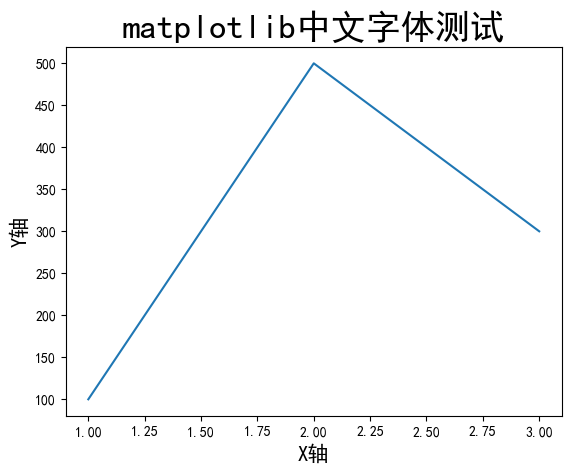

In [12]:
import matplotlib.pyplot as plt

plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()